In [1]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

**Remove continents which have only one country in dataframe.**


In [8]:
# continents with only one country
world.groupby(by='continent').count()

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,51,51,51,51,51
Antarctica,1,1,1,1,1
Asia,47,47,47,47,47
Europe,39,39,39,39,39
North America,18,18,18,18,18
Oceania,7,7,7,7,7
Seven seas (open ocean),1,1,1,1,1
South America,13,13,13,13,13


In [9]:
# remove these continents
world = world[(world.name != "Antarctica")]

**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [20]:
world_filtered = world.sort_values(by = ['continent', 'pop_est'], ascending = [True, False]).groupby(['continent'], sort=True).head(3)

**Print the 'world_filtered' dataframe.**

In [21]:
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
56,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.692 6.259, 2.749 7.871, 2.724 8.50..."
165,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.789 8.003, 44.964 5.002, 43.661 4..."
163,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.866 22.000, 32.900 22.000, 29.020..."
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508..."
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.327 28.262, 97.403 27.883, 97.052..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859..."
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.120 53.757, 14.353 53.248, 14.075..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0..."


-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

<AxesSubplot:>

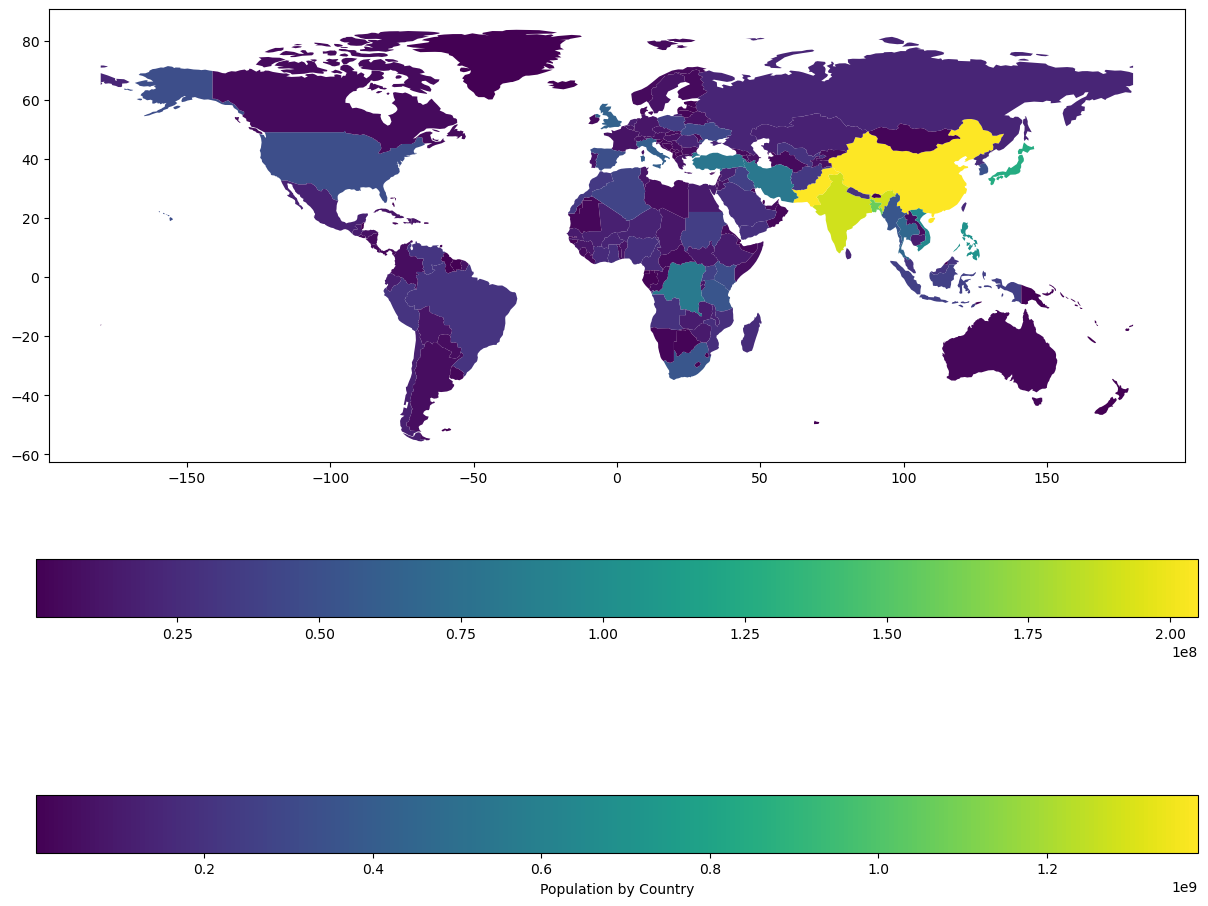

In [31]:
# create figure and axes

fig, ax = plt.subplots(figsize = (15,12))

# create map from world_filtered data-frame

world_filtered.plot(column = 'pop_est', ax = ax, legend = True,
                    legend_kwds={'label': "Population by Country",
                    'orientation': 'horizontal'})

# add the rest of the countries

remaining_world_mask = ~world.isin(world_filtered).all(axis='columns')

remaining_world = world[remaining_world_mask]

remaining_world.plot(column = 'pop_est', ax = ax, legend = True,
                    legend_kwds={'orientation': 'horizontal'})

### Plotly

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 

In [ ]:
# get geometry


# create figure and axes




# create map from world_filtered data-frame




# add the rest of the countries



# add cities
